In [ ]:
!pip install PyGithub
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
from github import Github
import github
matplotlib.style.use('seaborn')
%matplotlib inline

     |████████████████████████████████| 291 kB 8.6 MB/s 
     |████████████████████████████████| 961 kB 57.8 MB/s 


In [ ]:
pd.set_option("display.precision", 3)
Models=['CNN','MLP','LSTM','GRU']
r2_scores={}
mae={}
rmse={}
states=[]
from IPython.display import display
for model in Models:
  print(model+' model')
  #print("Model:",model," result")
  df=pd.read_csv("https://raw.githubusercontent.com/sureshkuc/Data-Science-in-Life-Science-Project/main/Indian-States-Model-Results/"+model+"_on_short_data.csv").drop(columns =["Unnamed: 0"])
  df=df[df['State']!='Delhi']
  #print(df.head())
  temp1=df.groupby(['State']).apply(lambda df: df.loc[df.RMSE.idxmin()]).copy()
  temp1.reset_index(drop=True, inplace=True)
  display(temp1[['State','MAE','RMSE','R2_Score']])
  temp1=temp1.sort_values(["State"], ascending = (False))
  #print(temp1[['State','MAE','RMSE','R2_Score']])
  r2_scores[model]=list(temp1['R2_Score'])
  mae[model]=list(temp1['MAE'])
  rmse[model]=list(temp1['RMSE'])
  states=list(temp1['State'])
  

CNN model


,State,MAE,RMSE,R2_Score
0,Karnataka,0.024,0.029,0.931
1,Kerala,0.008,0.009,0.994
2,Maharashtra,0.009,0.010,0.990
3,Tamil-Nadu,0.011,0.012,0.992
4,Uttar-Pradesh,0.013,0.017,0.981


MLP model


,State,MAE,RMSE,R2_Score
0,Karnataka,0.033,0.036,0.930
1,Kerala,0.060,0.077,0.661
2,Maharashtra,0.026,0.030,0.923
3,Tamil-Nadu,0.026,0.034,0.945
4,Uttar-Pradesh,0.037,0.040,0.891


LSTM model


,State,MAE,RMSE,R2_Score
0,Karnataka,0.030,0.036,0.892
1,Kerala,0.043,0.045,0.833
2,Maharashtra,0.010,0.011,0.990
3,Tamil-Nadu,0.012,0.013,0.992
4,Uttar-Pradesh,0.015,0.018,0.977


GRU model


,State,MAE,RMSE,R2_Score
0,Karnataka,0.038,0.042,0.907
1,Kerala,0.076,0.091,0.308
2,Maharashtra,0.040,0.049,0.741
3,Tamil-Nadu,0.016,0.019,0.978
4,Uttar-Pradesh,0.025,0.034,0.899


In [ ]:
state_df=pd.DataFrame({'State':states})
r2_score_df = pd.DataFrame(r2_scores)
mae_df = pd.DataFrame(mae)
rmse_df = pd.DataFrame(rmse)
result= pd.concat([state_df, r2_score_df,mae_df,rmse_df], axis=1)
display(result)

,State,CNN,MLP,LSTM,GRU,CNN,MLP,LSTM,GRU,CNN,MLP,LSTM,GRU
0,Uttar-Pradesh,0.981,0.891,0.977,0.899,0.013,0.037,0.015,0.025,0.017,0.040,0.018,0.034
1,Tamil-Nadu,0.992,0.945,0.992,0.978,0.011,0.026,0.012,0.016,0.012,0.034,0.013,0.019
2,Maharashtra,0.990,0.923,0.990,0.741,0.009,0.026,0.010,0.040,0.010,0.030,0.011,0.049
3,Kerala,0.994,0.661,0.833,0.308,0.008,0.060,0.043,0.076,0.009,0.077,0.045,0.091
4,Karnataka,0.931,0.930,0.892,0.907,0.024,0.033,0.030,0.038,0.029,0.036,0.036,0.042


In [ ]:
r2_score_df

,CNN,MLP,LSTM,GRU
0,0.981,0.891,0.977,0.899
1,0.992,0.945,0.992,0.978
2,0.990,0.923,0.990,0.741
3,0.994,0.661,0.833,0.308
4,0.931,0.930,0.892,0.907


In [ ]:
print(result.to_latex())

\begin{tabular}{llrrrrrrrrrrrr}
\toprule
{} &          State &    CNN &    MLP &   LSTM &    GRU &    CNN &    MLP &   LSTM &    GRU &    CNN &    MLP &   LSTM &    GRU \\
\midrule
0 &  Uttar-Pradesh &  0.981 &  0.891 &  0.977 &  0.899 &  0.013 &  0.037 &  0.015 &  0.025 &  0.017 &  0.040 &  0.018 &  0.034 \\
1 &     Tamil-Nadu &  0.992 &  0.945 &  0.992 &  0.978 &  0.011 &  0.026 &  0.012 &  0.016 &  0.012 &  0.034 &  0.013 &  0.019 \\
2 &    Maharashtra &  0.990 &  0.923 &  0.990 &  0.741 &  0.009 &  0.026 &  0.010 &  0.040 &  0.010 &  0.030 &  0.011 &  0.049 \\
3 &         Kerala &  0.994 &  0.661 &  0.833 &  0.308 &  0.008 &  0.060 &  0.043 &  0.076 &  0.009 &  0.077 &  0.045 &  0.091 \\
4 &      Karnataka &  0.931 &  0.930 &  0.892 &  0.907 &  0.024 &  0.033 &  0.030 &  0.038 &  0.029 &  0.036 &  0.036 &  0.042 \\
\bottomrule
\end{tabular}



In [ ]:
def radar_chart(categories,CNN,MLP,LSTM,GRU,title):
  categories = [*categories, categories[0]]
  CNN = [*CNN, CNN[0]]
  MLP = [*MLP, MLP[0]]
  LSTM = [*LSTM, LSTM[0]]
  #BLSTM = [*BLSTM, BLSTM[0]]
  GRU = [*GRU, GRU[0]]
  N=len(LSTM)-1
  angle=[n/float(N)*2*3.14 for n in range(N)]
  angle+=angle[:1]
  plt.figure(figsize=(8, 8))
  
  plt.polar(angle,CNN,label='CNN',color='g')
  plt.polar(angle,MLP,label='MLP',color='r')
  plt.polar(angle,LSTM,label='LSTM',color='blue')
  #plt.polar(angle,BLSTM,label='BLSTM',color='purple')
  plt.polar(angle,GRU,label='GRU',color='black')
  plt.xticks(angle,labels=categories[:-1])
  plt.yticks()
  plt.title("Radar Chart:"+title,size=20)
  plt.legend()
  plt.savefig(title+'.pdf')  

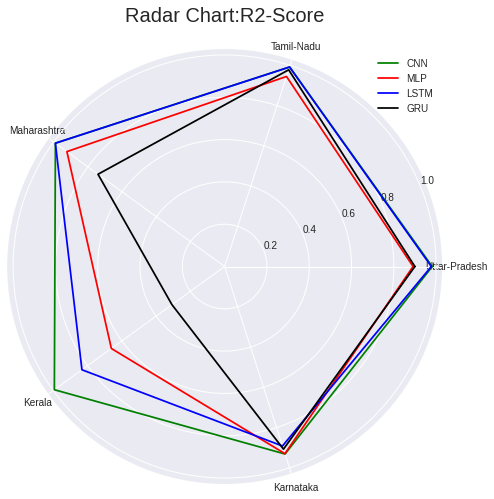

In [ ]:
radar_chart(states,r2_scores['CNN'],r2_scores['MLP'],r2_scores['LSTM'],r2_scores['GRU'],title="R2-Score")

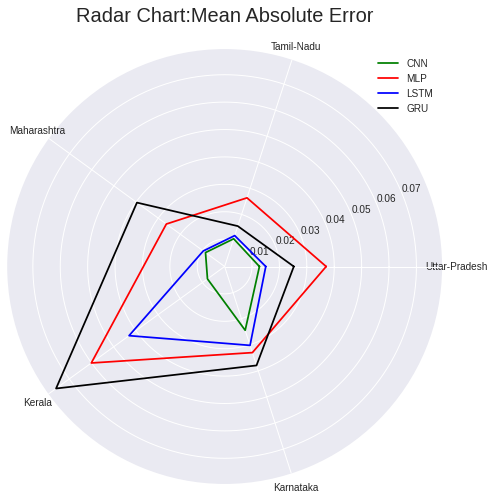

In [ ]:
radar_chart(states,mae['CNN'],mae['MLP'],mae['LSTM'],mae['GRU'],title="Mean Absolute Error")

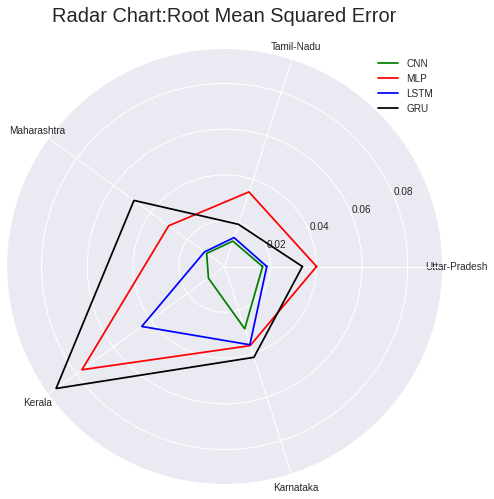

In [ ]:
radar_chart(states,rmse['CNN'],rmse['MLP'],rmse['LSTM'],rmse['GRU'],title="Root Mean Squared Error")